In [29]:
import cv2
import numpy as np
import click
import matplotlib.pyplot as plt
import sys
from scipy import ndimage
from skimage import io
from scipy import ndimage
from PIL import Image
# from matplotlib import pyplot as plt
# from matplotlib import image as mpimg

In [2]:
def convolution(img, kernel):
    """ This function executes the convolution between `img` and `kernel`.
    """
    print("[{}]\tRunning convolution...\n".format(img))
    # Load the image.
    image = cv2.imread(img)
    # Flip template before convolution.
    kernel = cv2.flip(kernel, -1)
    # Get size of image and kernel. 3rd value of shape is colour channel.
    (image_h, image_w) = image.shape[:2]
    (kernel_h, kernel_w) = kernel.shape[:2]
    (pad_h, pad_w) = (kernel_h // 2, kernel_w // 2)
    # Create image to write to.
    output = np.zeros(image.shape)
    # Slide kernel across every pixel.
    for y in range(pad_h, image_h - pad_h):
        for x in range(pad_w, image_w - pad_w):
            # If coloured, loop for colours.
            for colour in range(image.shape[2]):
                # Get center pixel.
                center = image[
                    y - pad_h : y + pad_h + 1, x - pad_w : x + pad_w + 1, colour
                ]
                # Perform convolution and map value to [0, 255].
                # Write back value to output image.
                output[y, x, colour] = (center * kernel).sum() / 255

    # Return the result of the convolution.
    return output


In [20]:
# img = "C:/Users/mahamedhat/Downloads/dog.jpg"
# kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
# convolution(img, kernel)

In [4]:
def fourier(img, kernel):
    """ Compute convolution between `img` and `kernel` using numpy's FFT.
    """
    # Load the image.
    image = cv2.imread(img)
    # Get size of image and kernel.
    (image_h, image_w) = image.shape[:2]
    (kernel_h, kernel_w) = kernel.shape[:2]
    # Apply padding to the kernel.
    padded_kernel = np.zeros(image.shape[:2])
    start_h = (image_h - kernel_h) // 2
    start_w = (image_w - kernel_w) // 2
    padded_kernel[start_h : start_h + kernel_h, start_w : start_w + kernel_w] = kernel
    # Create image to write to.
    output = np.zeros(image.shape)
    # Run FFT on all 3 channels.
    for colour in range(3):
        Fi = np.fft.fft2(image[:, :, colour])
        Fk = np.fft.fft2(padded_kernel)
        # Inverse fourier.
        output[:, :, colour] = np.fft.fftshift(np.fft.ifft2(Fi * Fk)) / 255

    # Return the result of convolution.
    return output

In [21]:
# # img = 'C:/Users/ameer/Downloads/hybrid-images/data/cat.bmp'
# # kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
# fourier(img, kernel)

In [6]:
def gaussian_blur(image, sigma, flag):
    """ Builds a Gaussian kernel used to perform the LPF on an image.
    """
    print("[{}]\tCalculating Gaussian kernel...".format(image))

    # Calculate size of filter.
    size = 8 * sigma + 1
    if not size % 2:
        size = size + 1

    center = size // 2
    kernel = np.zeros((size, size))

    # Generate Gaussian blur.
    for y in range(size):
        for x in range(size):
            diff = (y - center) ** 2 + (x - center) ** 2
            kernel[y, x] = np.exp(-diff / (2 * sigma ** 2))

    kernel = kernel / np.sum(kernel)

    if flag:
        return fourier(image, kernel)
    else:
        return convolution(image, kernel)


In [22]:
# gaussian_blur(img, 1, 1)

In [23]:
def low_pass(image, cutoff, flag):
    """ Generate low pass filter of image.
    """
    print("[{}]\tGenerating low pass image...".format(image))
    return gaussian_blur(image, cutoff, flag)


In [24]:
# image = "C:/Users/mahamedhat/Downloads/cat.jpg"
# low_pass(image, 7, 1)

In [25]:
def high_pass(image, cutoff, flag):
    """ Generate high pass filter of image. This is simply the image minus its
    low passed result.
    """
    print("[{}]\tGenerating high pass image...".format(image))
    return (cv2.imread(image) / 255) - low_pass(image, cutoff, flag)



In [26]:
# image = "C:/Users/mahamedhat/Downloads/dog.jpg"
# high_pass(image, 7, 1)

In [27]:
def hybrid_image(images, cutoff, flag):
    """ Create a hybrid image by summing together the low and high frequency
    images.
    """
    # Perform low pass filter and export.
    low = low_pass(images[0], cutoff[0], flag)
#     cv2.imwrite("low.jpg", low * 255)
    # Perform high pass filter and export.
    high = high_pass(images[1], cutoff[1], flag)
#     cv2.imwrite("high.jpg", (high + 0.5) * 255)
    
    result = low + high 
    print("Creating hybrid image...")
    return result


In [13]:
# function for displaying image
def display(img):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

[C:/Users/mahamedhat/Downloads/dog.jpg]	Generating low pass image...
[C:/Users/mahamedhat/Downloads/dog.jpg]	Calculating Gaussian kernel...
[C:/Users/mahamedhat/Downloads/cat.jpg]	Generating high pass image...
[C:/Users/mahamedhat/Downloads/cat.jpg]	Generating low pass image...
[C:/Users/mahamedhat/Downloads/cat.jpg]	Calculating Gaussian kernel...


C:\Users\mahamedhat\AppData\Local\Temp\ipykernel_21208\1634469265.py:21: ComplexWarning: Casting complex values to real discards the imaginary part
  output[:, :, colour] = np.fft.fftshift(np.fft.ifft2(Fi * Fk)) / 255
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Creating hybrid image...


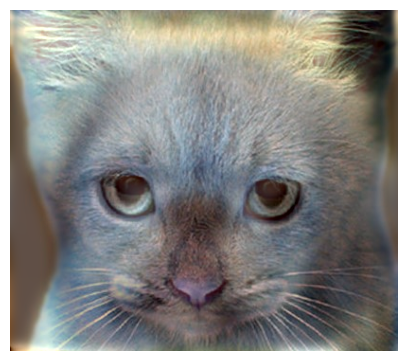

True

In [35]:
img1= "C:/Users/mahamedhat/Downloads/dog.jpg"
img2="C:/Users/mahamedhat/Downloads/cat.jpg"
images=[img1 , img2]
final=hybrid_image(images, [7,7], 1)
display(final)
cv2.imwrite('C:/Users/mahamedhat/Downloads/hybridoutput.jpg', final*255)  



In [93]:
# def output_vis(image):
#     """ Display hybrid image comparison for report. Visualisation shows 5 images
#     reducing in size to simulate viewing the image from a distance.
#     """
#     print("Creating visualisation...")

#     num = 5  # Number of images to display.
#     gap = 2  # Gap between images (px).

#     # Create list of images.
#     image_list = [image]
#     max_height = image.shape[0]
#     max_width = image.shape[1]

#     # Add images to list and increase max width.
#     for i in range(1, num):
#         tmp = cv2.resize(image, (0, 0), fx=0.5 ** i, fy=0.5 ** i)
#         max_width += tmp.shape[1] + gap
#         image_list.append(tmp)

#     # Create space for image stack.
#     stack = np.ones((max_height, max_width, 3)) * 255

#     # Add images to stack.
#     current_x = 0
#     for img in image_list:
#         stack[
#             max_height - img.shape[0] :, current_x : img.shape[1] + current_x, :
#         ] = img
#         current_x += img.shape[1] + gap

#     return stack

In [94]:
# image = [img1,img2]
# output_vis(image)